# Introdução ao `seaborn`
Este notebook tem como objetivo introduzir a biblioteca e seus conceitos básicas. Não vamos entrar tanto em detalhes como a Matplotlib. O intuito é que você saiba que exista e como fazer um plot básico com ela caso queira. Dito isso, características da `seaborn`:

- É uma biblioteca para criar plots focados em estatística usando Python
- É construida em cima do matplotlib
- Integra muito bem com Pandas
- Preenche uma lacuna que o matplotlib deixou
    - Muitos usuários reclamam que é muito complexo fazer um plot com ela
    - Seaborn já bem mais alto nível (e muitos plots são mais bonitos)
    - Conseguimos fazer plots bem elaborados de maneira bem rápida

## Organização da biblioteca
- A biblioteca é estruturada em volta de 3 grandes módulos
    - [Plots relacionais](https://seaborn.pydata.org/api.html#relational-plots) (ex: `lineplot`, `scatterplot`)
    - [Plots de distribuições](https://seaborn.pydata.org/api.html#distribution-plots) (ex: `histplot`, `kdeplot`)
    - [Plots categoricos](https://seaborn.pydata.org/api.html#categorical-plots) (ex: `boxplot`, `barplot`)
    
**De maneira visual:**

![](../assets/seaborn-overview.png)

- Todos os plots são feitos em cima de um objeto `matplotlib.pyplot.Axes`
    - O que muda é apenas o visual do plot que é melhor trabalho na lib
    
#### Galeria de exemplos
- Assim como a Matplotlib, a Seaborn possui uma galeria de exemplos
    - https://seaborn.pydata.org/examples/index.html
- Porém, essa galeria é bem mais completa e é uma excelente fonte de inspiração

## Principais plots com a biblioteca
- Vamos ao que interessa, gerar plots
- Porém, primeiro vamos importar a biblioteca

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Carregando dados disponíveis na biblioteca
- Dentro da biblioteca existe alguns datasets disponíveis principalmente para fins educacionais
- São diversos DataFrames com diferentes tipos de dados
    - Como disse antes, a biblioteca é muito integrada com Pandas
- Podemos dar uma olhada na lista de datasets disponíveis:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

- E podemos carregar algum desses dados da seguinte forma:

In [8]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## Line plot
- Assim como para a Matplotlib, vamos começar com um grafico de linha 2D
- Vamos usar o DF `tips` para fazer um nosso primeiro plot
- [Documentação](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

<Axes: xlabel='timepoint', ylabel='signal'>

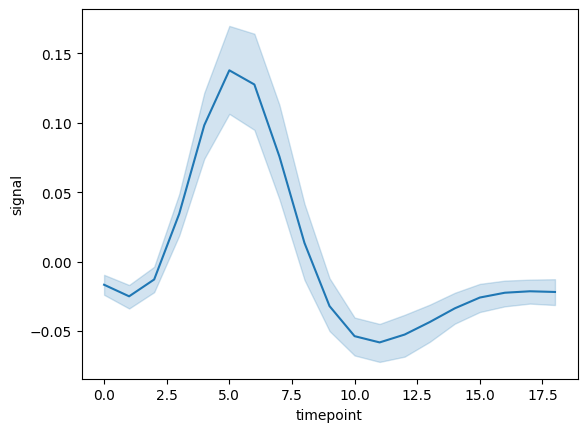

In [9]:
sns.lineplot(x="timepoint", y="signal", data=fmri)

- **Observações relevantes:**
    - Passamos um DataFrame e em `x` e `y` informamos quais colunas desejamos usar
    - O nome da coluna já vira os labels
    - Como existe multiplos valores para um mesmo `timepoint` ele já plota um range de valores (estilo `plt.fill_between`)
    - A função nos retornou um objeto `Axes`
        - Ela é construída em cima da matplotlib
        - Com esse objeto podemos customizar o plot usando tudo que já vimos até aqui

- Não somos obrigados a passar um DataFrame, podemos passar direto `x` e `y` como arrays-like
    - Embora, na maioria das vezes vamos usar um DF

<Axes: >

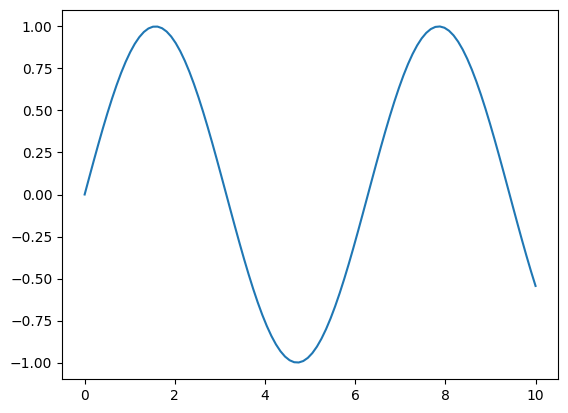

In [10]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
sns.lineplot(x=x, y=y)

- Também podemos passar parâmetros que são utilizados no `matplotlib.axes.Axes.plot()`

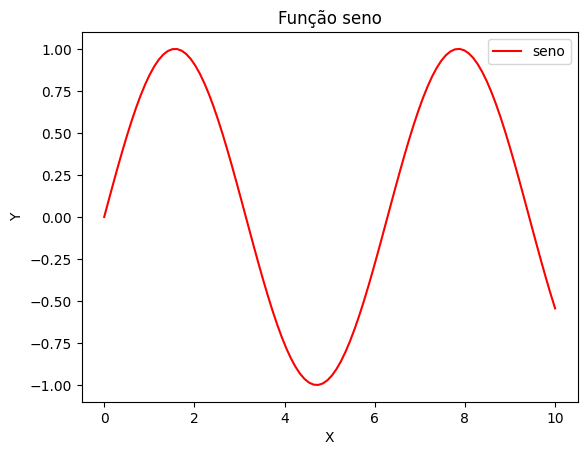

In [11]:
ax = sns.lineplot(x=x, y=y, color="r", label="seno")
ax.set(title="Função seno", xlabel="X", ylabel="Y")
ax.legend()

- Outra coisa bem interessante que podemos fazer é passar o `Axes` como parametro:

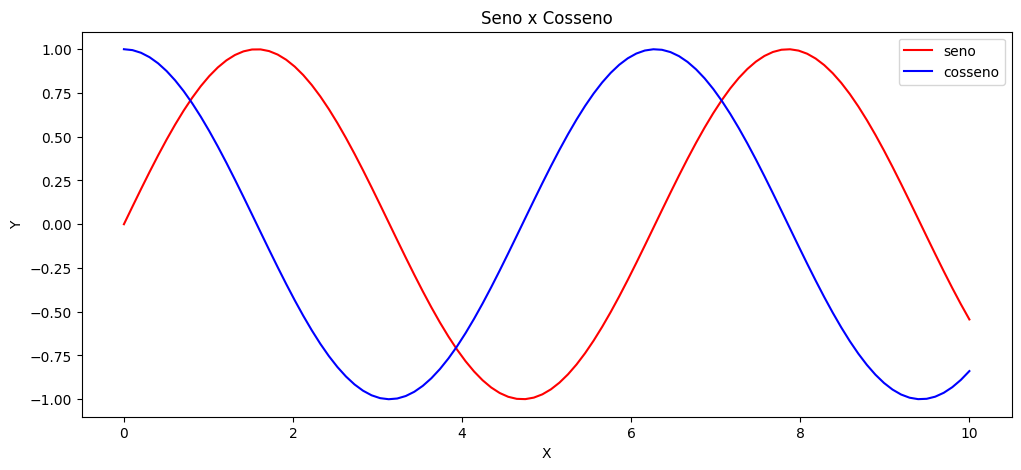

In [12]:
y2 = np.cos(x)
fig, my_ax = plt.subplots(figsize=(12, 5))

my_ax = sns.lineplot(x=x, y=y, color="r", label="seno", ax=my_ax)
my_ax = sns.lineplot(x=x, y=y2, color="b", label="cosseno", ax=my_ax)
my_ax.set(title="Seno x Cosseno", xlabel="X", ylabel="Y")
my_ax.legend()

- Podemos fazer subplots normalmente:

[Text(0.5, 1.0, 'Cosseno'), Text(0.5, 0, 'X'), Text(0, 0.5, 'Y')]

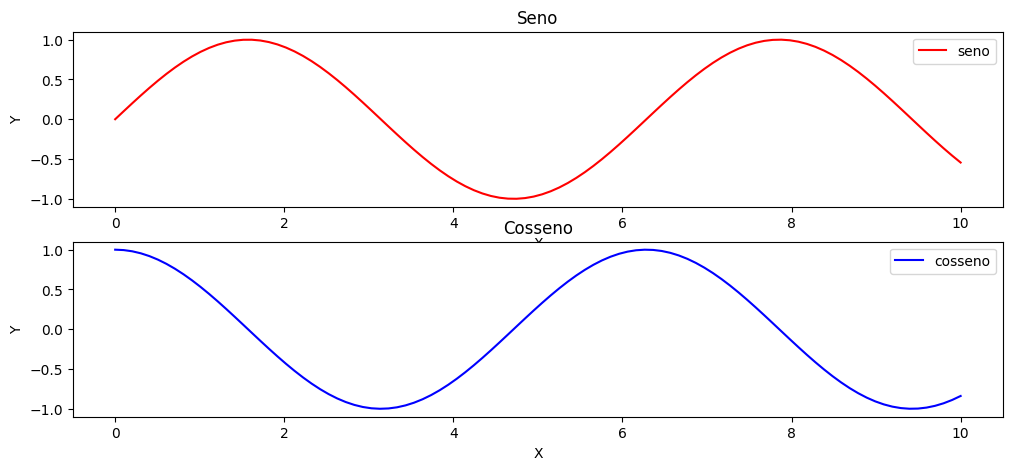

In [13]:
fig, my_axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5))

my_ax_0 = sns.lineplot(x=x, y=y, color="r", label="seno", ax=my_axes[0])
my_ax_1 = sns.lineplot(x=x, y=y2, color="b", label="cosseno", ax=my_axes[1])
my_ax_0.set(title="Seno", xlabel="X", ylabel="Y")
my_ax_1.set(title="Cosseno", xlabel="X", ylabel="Y")

- Você deve estar se perguntando: mas qual a vantagem de usar a Seaborn?
    - Vamos começar a explorar agora
    - Usamos o line plot apenas para mostrar como as duas bibliotecas conversam uma com a outra
    - Agora vamos ao potencial da Seaborn

In [15]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

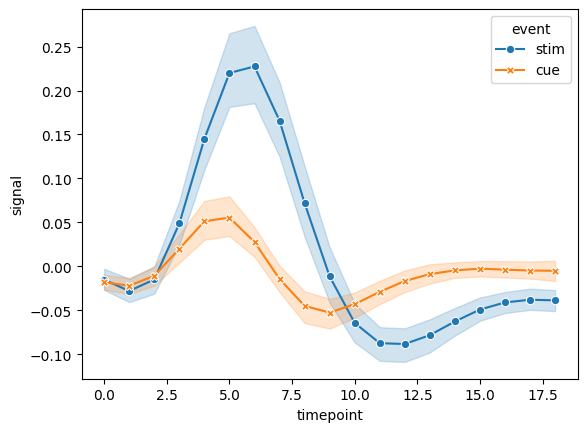

In [18]:
sns.lineplot(data=fmri, # dataset
             x="timepoint", # nome da coluna do dataset que vai ser o eixo x
             y="signal", # nome da coluna do dataset que vai ser o eixo y
             hue="event", # Agrupe por evento
             style="event", # Coloque marcadores em cima de evento
             markers=True, # Habilita os marcadores
             dashes=False # Desabilita tracejado
            )

- Perceba que foram feitas diversas operações apenas com uma chamada de função
- Isso se repete para os diversos métodos disponíveis da biblioteca
- E novamente, se você passar todos os parametros desejados como arrays-like, também funciona
    - Porém os labels e titulos da legenda não virão preenchidos

<Axes: >

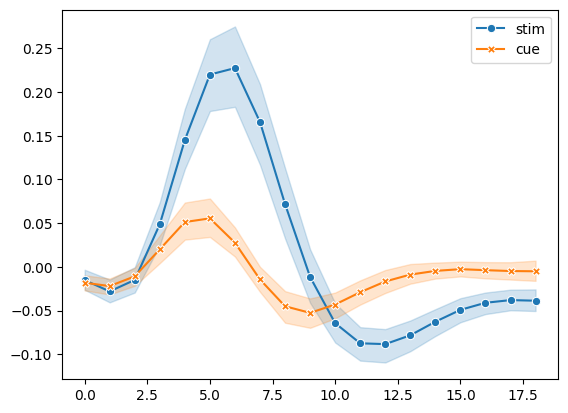

In [19]:
sns.lineplot(x=fmri["timepoint"].values,
             y=fmri["signal"].values,
             hue=fmri["event"].values,
             style=fmri["event"].values, 
             markers=True, 
             dashes=False 
            )

## Scatter plot
- Vamos dar uma olhada no `scatterplot`
- O princípio é mesmo do `lineplot`
    - [Documentação](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)
- Vamos carregar outro dataset para plotarmos

In [20]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

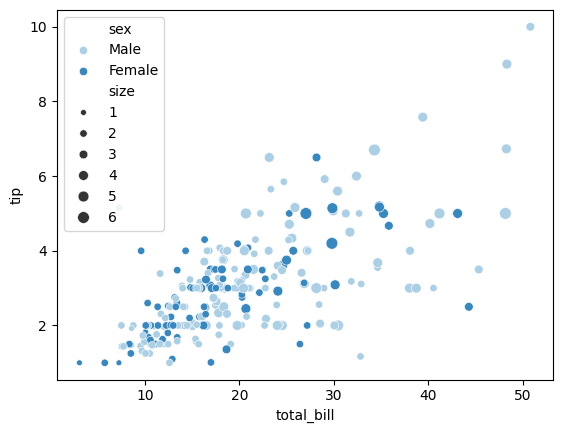

In [21]:
sns.scatterplot(data=tips, 
            x="total_bill", 
            y="tip", 
            hue="sex",
            size="size",
            palette="Blues"
           )

-  Dois parametros "novos":
    - `size`: cada marcador é modificado de acordo com o tamanho a associado a ele
    - `palette`: determina a paleta de cor que será utilizada. Existem diversos tipos de paletas que você pode verificar na [Documentação](https://seaborn.pydata.org/tutorial/color_palettes.html)

- Podemos fazer o `hue='day'`:

<Axes: xlabel='total_bill', ylabel='tip'>

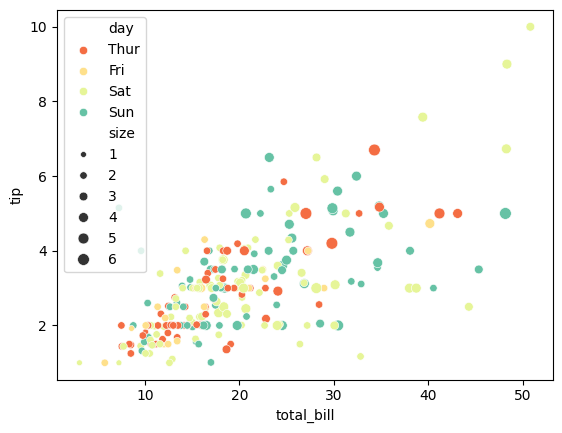

In [22]:
sns.scatterplot(data=tips, 
            x="total_bill", 
            y="tip", 
            hue="day",
            size="size",
            palette="Spectral"            
           )

## Gráfico de barras
- Agora vamos fazer um gráfico de barras usando o `barplot()`
    - [Documentação](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)

<Axes: xlabel='sex', ylabel='tip'>

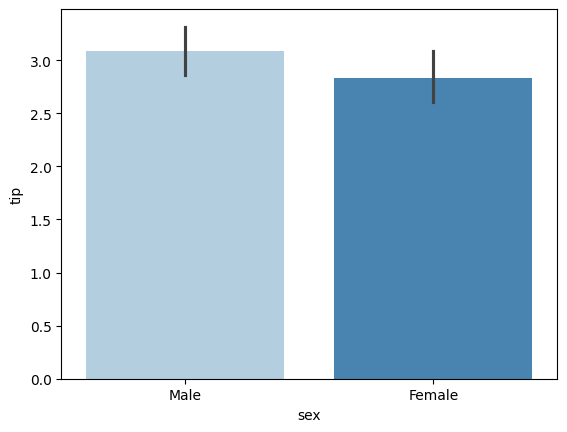

In [25]:
sns.barplot(data=tips, 
            x="sex", 
            y="tip",
            hue="sex",         
            palette="Blues"            
           )

- Perceba que foi feita uma agregação de todos os valores para Homens e Mulheres
    - Por padrão, esse agregador é a média
    - O tracinho no topo representa o desvio padrão
- Podemos alterar esse agregador passando uma função via o parametro `estimatorcallable`

/tmp/ipykernel_80861/624305783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips,


<Axes: xlabel='sex', ylabel='tip'>

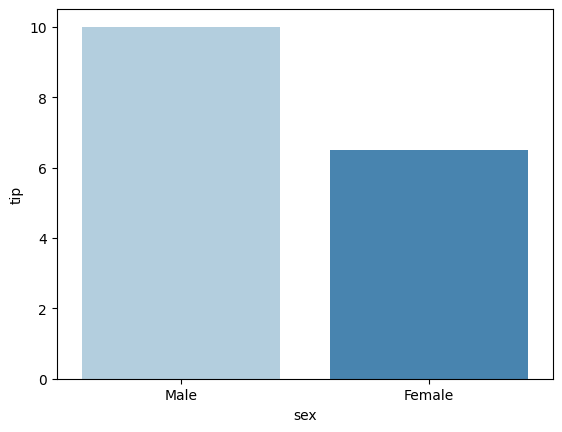

In [27]:
agg = lambda x: x.max()
sns.barplot(data=tips, 
            x="sex", 
            y="tip",             
            palette="Blues",
            estimator=agg,
            errorbar=None # Para tirar o intervalo de confiança
           )

- Podemos agregar por dia da semana também:

/tmp/ipykernel_80861/2441078320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips,


<Axes: xlabel='day', ylabel='tip'>

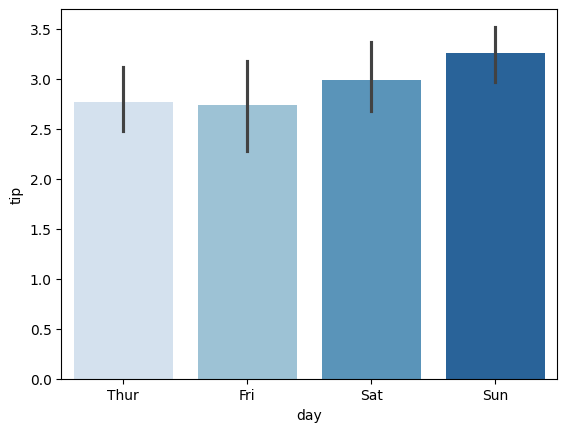

In [28]:
sns.barplot(data=tips, 
            x="day", 
            y="tip",             
            palette="Blues"            
           )

## Boxplots
- Também fizemos alguns boxplots com a matplotlib
- Aqui vai ser ainda mais fácil
- [Documentação](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

<Axes: xlabel='day', ylabel='tip'>

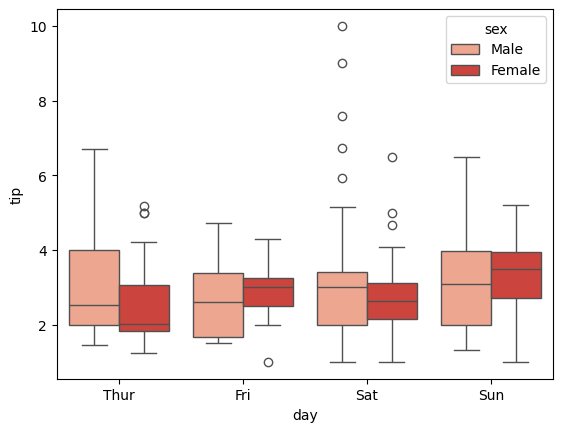

In [29]:
sns.boxplot(data=tips,
            x="day",
            y="tip",
            hue="sex", 
            palette="Reds"           
           )

## Violin plots
- Da mesma forma, podemos fazer um violin plot
- [Documentação](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

<Axes: xlabel='day', ylabel='tip'>

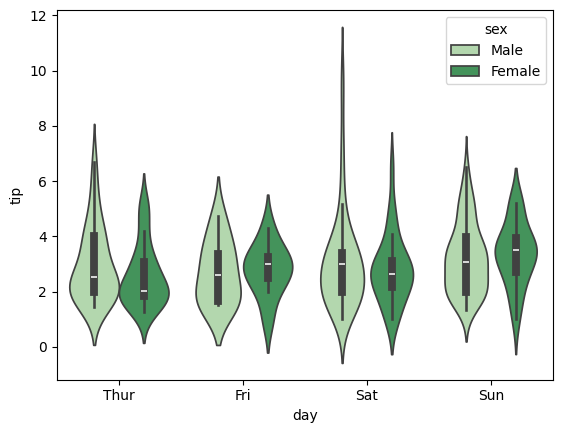

In [30]:
sns.violinplot(data=tips,
               x="day",
               y="tip",
               hue="sex", 
               palette="Greens"           
              ) 

## Strip plots
- É mais uma maneira de ver a dispersão dos dados em um plot 2D
    - [Documentação](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)

<Axes: xlabel='day', ylabel='tip'>

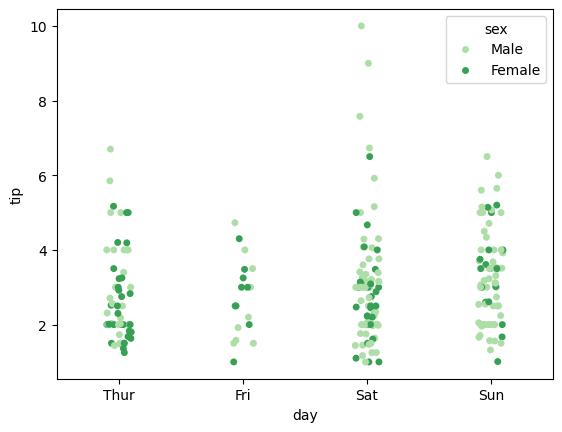

In [31]:
sns.stripplot(data=tips,
               x="day",
               y="tip",
               hue="sex", 
               palette="Greens"           
              ) 

## Histograma e distribuições
- Lembra do histograma? Obviamente ele também está presente aqui
- [Documentação](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

<Axes: xlabel='tip', ylabel='Count'>

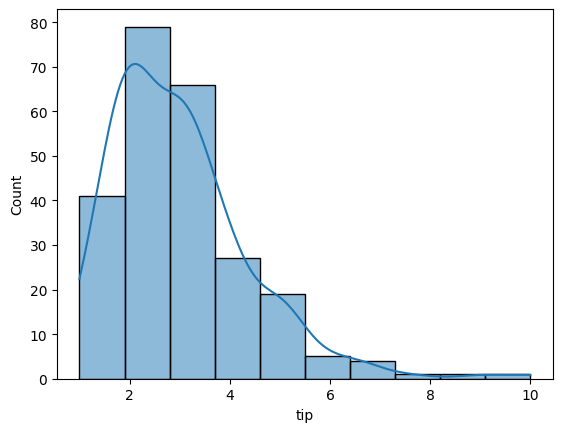

In [32]:
sns.histplot(tips["tip"], kde=True, bins=10)

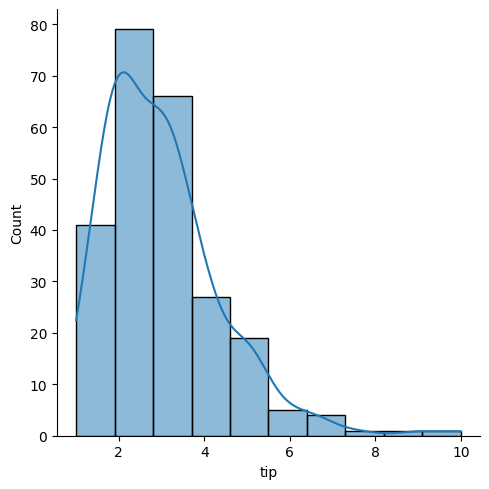

In [33]:
sns.displot(tips["tip"], kde=True, bins=10)

# Join plots
- Fazendo mais de um plot em uma mesma figura
    - [Documentação](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)

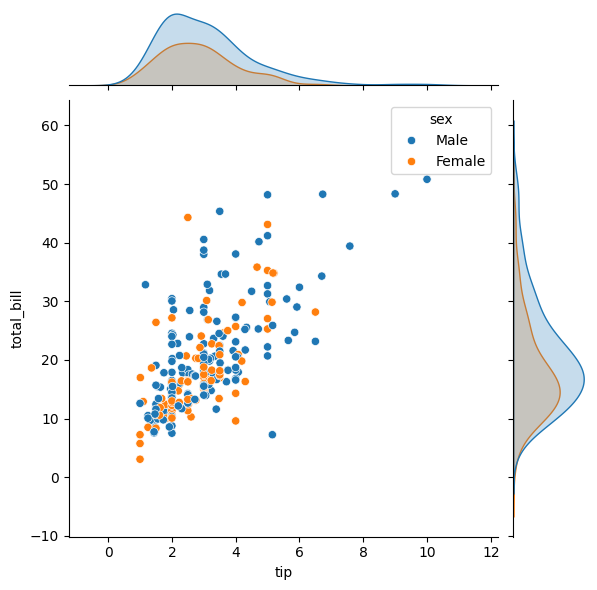

In [34]:
sns.jointplot(data=tips, x="tip", y="total_bill", hue="sex")

- Uma outra maneira é usando o `JointGrid()`
    - Sugiro a leitura da [documentação](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)

## Pair plot
- Faz diversos plots que mostra o relacionamento dos atributos numericos
    - [Documentação](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)

- Vamos carregar um dataset novo para tal

In [35]:
ping = sns.load_dataset("penguins")
ping.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


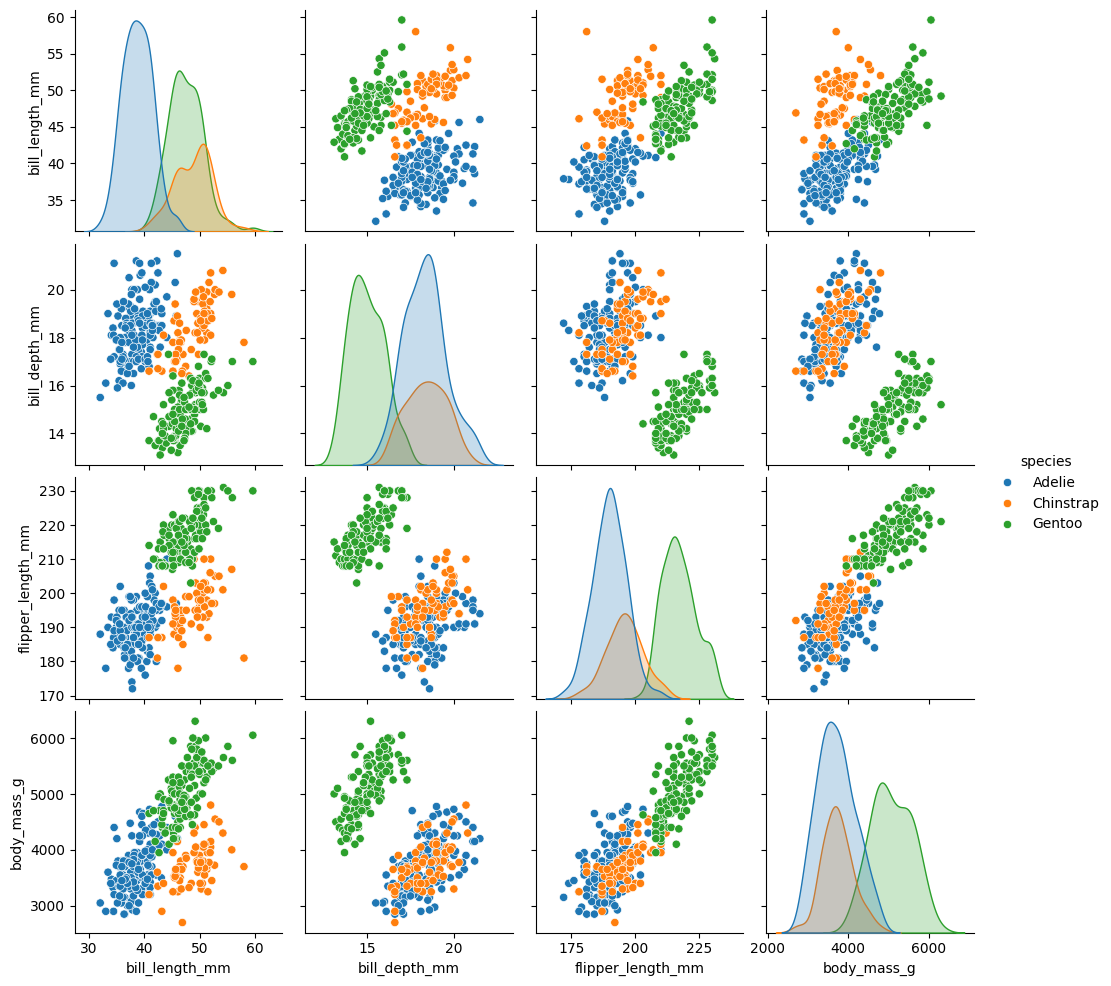

In [36]:
sns.pairplot(ping, hue="species")

## Mapa de calor
- Para concluir, vamos fazer um plot de um mapa de calor
    - [Documentação](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

- Primeiro, vamos calcular a matriz de correlação dentro do dataframe

In [47]:
pc = ping.corr()
pc

ValueError: could not convert string to float: 'Adelie'

<AxesSubplot:>

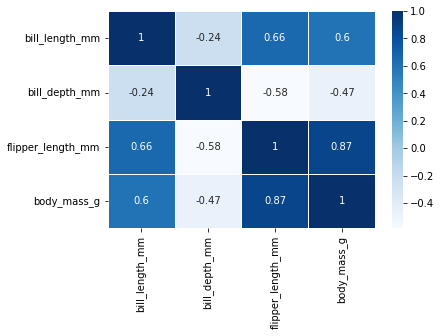

In [34]:
sns.heatmap(pc, annot=True, cmap="Blues", linewidths=.5)

___

# Exercício 7:
- Lembra do exercício de calcular a matriz de correlação na aula de Numpy?
- Volte naquele exercício, carregue os dados como um dataframe, calcule a matriz de correlação e gere o mapa de calor do mesmo

___